In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
# create crl figures

# also I apologize in advance for any messy code! I threw this together a little hapazardly.

# get data
crl_path = "/Users/etmu9498/Desktop/research/CRL_data/2021"
file_name = "P3_20210927H1_213003-253558.cdf"

os.chdir( crl_path)
crl_data = xr.open_dataset( file_name)


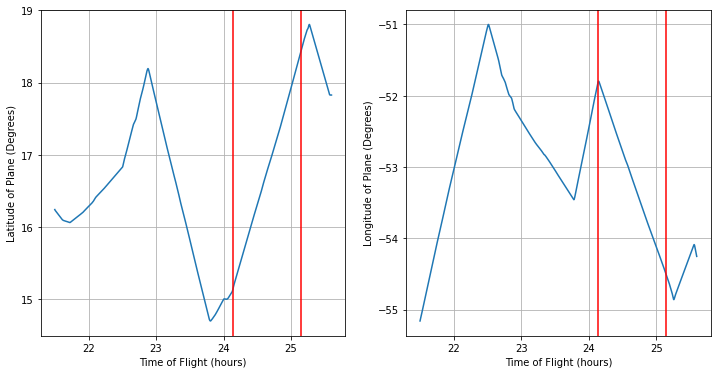

In [3]:
# choose indices for lat and lon limits

# good for reproducing tc eye wrt lat: 2500 to 4000
# good for reproducing tc eye wrt lat: 4100 to 6725
# good for reproducing tc eye wrt lon: 1820 to 4000
# really good for reproducing tc eye wrt lat and lon: 4700 to 6725
# kinda good for reproducing tc eye wrt lon: 0 to 1820 

index1 = 4700  
index2 = 6500  

# plot how lat and lon vary over time to see if there is any overlap
# overlap -> plotting issues later!

# red lines represent index 1 and 2 choices, use them to pick non overlapping lat and lon values
fig = plt.figure( figsize=(12, 6))

plt.subplot( 121)
plt.plot( crl_data.time, crl_data.Lat)
plt.axvline(x=crl_data.time[index1], color='r')
plt.axvline(x=crl_data.time[index2], color='r')
plt.ylabel( 'Latitude of Plane (Degrees)')
plt.xlabel( 'Time of Flight (hours)')
plt.grid( 'on')

plt.subplot( 122)
plt.plot( crl_data.time, crl_data.Lon)
plt.axvline(x=crl_data.time[index1], color='r')
plt.axvline(x=crl_data.time[index2], color='r')
plt.ylabel( 'Longitude of Plane (Degrees)')
plt.xlabel( 'Time of Flight (hours)')
plt.grid( 'on')

C:\Users\etmu9498\AppData\Local\Temp/ipykernel_20856/1373856520.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh( lon, - crl_data.H, temp, cmap = color_map )
C:\Users\etmu9498\AppData\Local\Temp/ipykernel_20856/1373856520.py:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh( crl_lon, - crl_data.H, crl_lon_wvmr )
C:\Users\etmu9498\AppData\Local\Temp/ipykernel_20856/1373856520.py:55: MatplotlibDeprecationWarning: shading='flat

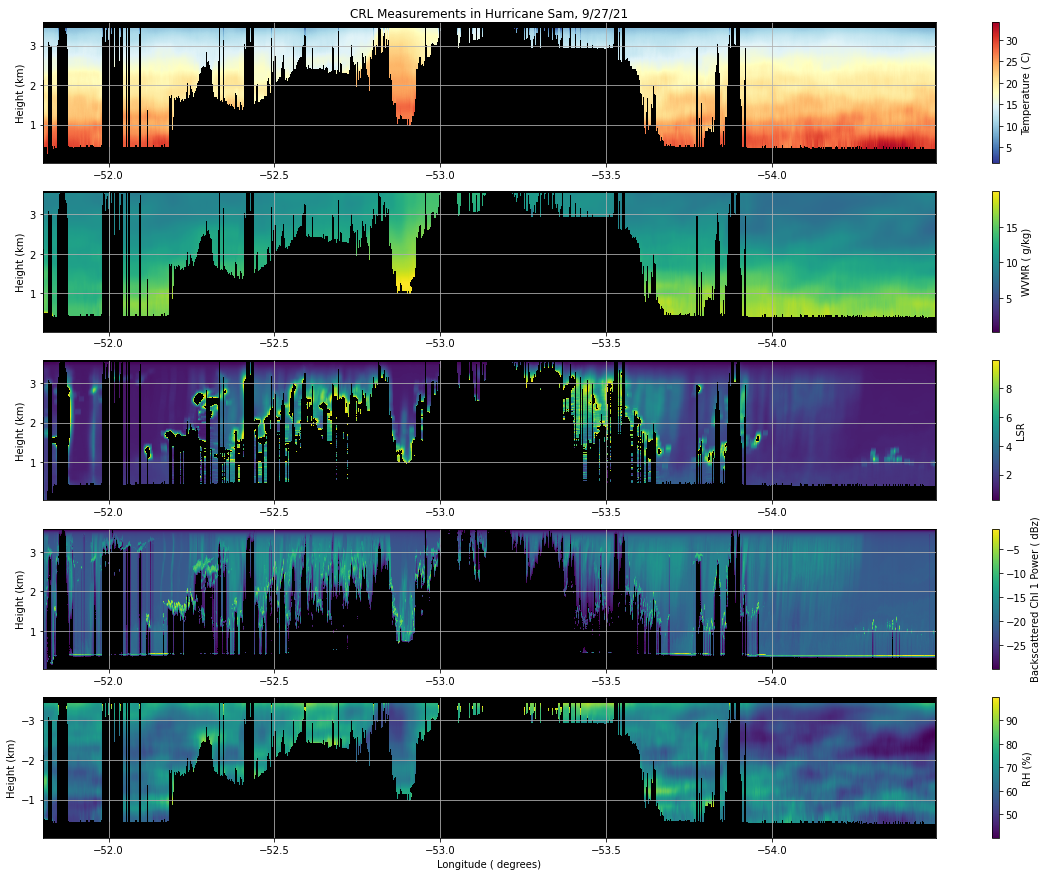

In [4]:
# temperature 
fig = plt.figure( figsize=(20, 15))
color_map = plt.cm.get_cmap( "RdYlBu").reversed()

plt.subplot(511)
lon = crl_data.Lon[index1:index2]
temp = crl_data.T[index1:index2, :].where( crl_data.T[index1:index2, :].values < 50).transpose()

plt.title( "CRL Measurements in Hurricane Sam, 9/27/21")

plt.pcolormesh( lon, - crl_data.H, temp, cmap = color_map ) 
plt.ylabel( 'Height (km)')
# plt.xlabel( 'Longitude (degrees)')
plt.xlim( [ crl_data.Lon[index1], crl_data.Lon[index2] ] )
plt.grid( 'on')

ax = plt.gca()
ax.set_facecolor('k')

plt.colorbar(label="Temperature ( C)")


# wvmr

plt.subplot(512)

step1 = crl_data.WVMR.where( crl_data.WVMR.values != 0)
step2 = step1.where( step1.values < 20)

crl_lon = crl_data.Lon[index1:index2]
crl_lon_wvmr = step2[index1:index2, :].transpose()

plt.pcolormesh( crl_lon, - crl_data.H, crl_lon_wvmr )  
plt.ylabel( 'Height (km)')
# plt.xlabel( 'Longitude ( degrees)')
plt.xlim( [ crl_data.Lon[index1], crl_data.Lon[index2] ] )
plt.grid( 'on')

ax = plt.gca()
ax.set_facecolor('k')

plt.colorbar(label="WVMR ( g/kg)")



# lsr

plt.subplot(513)

crl_lon = crl_data.Lon[index1:index2]

step1 = crl_data.LSR[index1:index2, :].where( crl_data.LSR[index1:index2].values < 10).transpose() 
crl_lon_lsr = step1.where( step1.values > .1) 

plt.pcolormesh( crl_lon, - crl_data.H, crl_lon_lsr )  
plt.ylabel( 'Height (km)')
# plt.xlabel( 'Longitude ( degrees)')
plt.xlim( [ crl_data.Lon[index1], crl_data.Lon[index2] ] )
plt.grid( 'on')

ax = plt.gca()
ax.set_facecolor('k')

plt.colorbar(label="LSR")



# power ch 1

plt.subplot(514)

crl_lon = crl_data.Lon[index1:index2]

step1 = 10 * np.log10( crl_data.P_ch1 )
step2 = step1.where( step1.values > -30)
crl_lon_pch1 = step2[index1:index2, :].transpose()

# step1 = crl_data.LSR[index1:index2, :].where( crl_data.LSR[index1:index2].values < 10).transpose()

plt.pcolormesh( crl_lon, - crl_data.H, crl_lon_pch1 )  
plt.ylabel( 'Height (km)')
# plt.xlabel( 'Longitude ( degrees)')
plt.xlim( [ crl_data.Lon[index1], crl_data.Lon[index2] ] )
plt.grid( 'on')

ax = plt.gca()
ax.set_facecolor('k')

plt.colorbar(label="Backscattered Chl 1 Power ( dBz)")



# relative humidity

lon = crl_data.Lon[index1:index2]

epsilon = .622
e_0 = 6.112 # hPa
b = 17.67
T_1 = 273.15 # K
T_2 = 29.65 # K

# calculate wvmr
step1 = crl_data.WVMR.where( crl_data.WVMR.values != 0)
step2 = step1.where( step1.values < 20)
wvmr = step2[index1:index2, :].transpose()

# calculate temperature (K)
temp = crl_data.T[index1:index2, :].where( crl_data.T[index1:index2, :].values < 50).transpose() + 273

# height -> pressure
# no negative sign in exp() because heights are already negative
scale_ht = 7.5 # km, just an estimate
pressure = 1013.3 * np.exp( crl_data.H / scale_ht) # hPa

# find saturation vapor pressure
e_s = e_0 * np.exp(  ( b * ( temp - T_1) ) / (temp - T_2) )

# find relative humidity!
saturation_wvmr = 1000 * (epsilon * e_s ) / ( pressure - e_s) # multiply by 1000 to get to g/kg like wvmr (above)
rh = 100 * wvmr / saturation_wvmr

# Plot RH!

plt.subplot(515)
plt.pcolormesh( lon, crl_data.H,  rh.where( rh.values < 100)) #- crl_data.H, crl_lat_rh )  
plt.ylabel( 'Height (km)')
plt.xlabel( 'Longitude ( degrees)')
plt.xlim( [ crl_data.Lon[index1], crl_data.Lon[index2] ] )
plt.grid( 'on')
plt.gca().invert_yaxis()
ax = plt.gca()
ax.set_facecolor('k')

plt.colorbar(label="RH (%)")


In [5]:
# Plot TDR 

# get data
tdr_path = "/Users/etmu9498/Desktop/research/sam-tdr/nc-files"
os.chdir( tdr_path)

inbound_name = "210927H1_2205_vert_inbound.nc"
outbound_name = "210927H1_2205_vert_outbound.nc"
inbound_data = xr.open_dataset( inbound_name)
outbound_data = xr.open_dataset( outbound_name)

# outbound_data

C:\Users\etmu9498\AppData\Local\Temp/ipykernel_20856/739108274.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh( lon, outbound_data.height, reflectivity, cmap = color_map )
C:\Users\etmu9498\AppData\Local\Temp/ipykernel_20856/739108274.py:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh( lon, inbound_data.height, reflectivity, cmap = color_map )
C:\Users\etmu9498\AppData\Local\Temp/ipykernel_20856/739108274.py:49: Matplotli

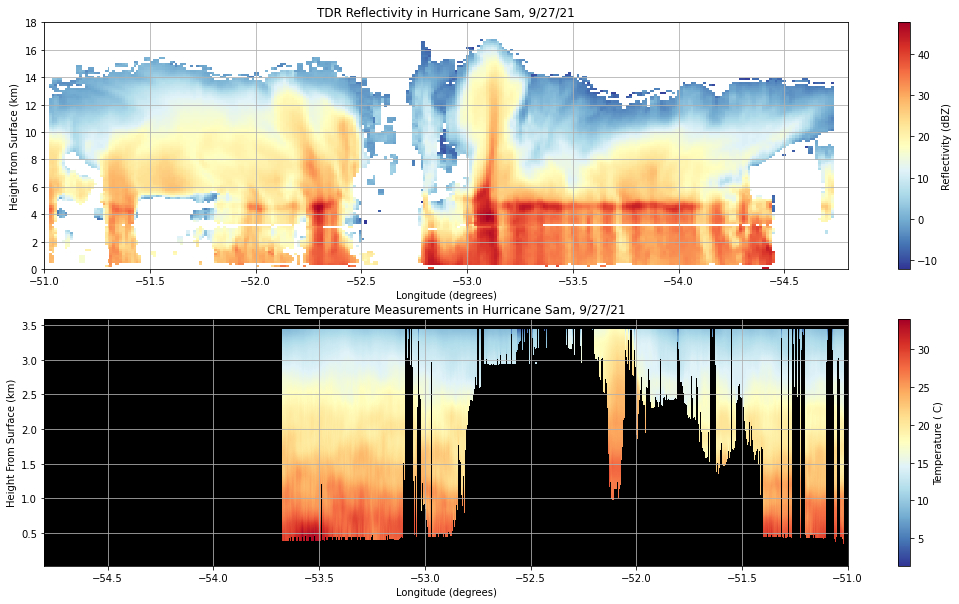

In [10]:
# crl and tdr figures together

# make TDR figure wrt Longitude

fig = plt.figure( figsize=(18, 10))
color_map = plt.cm.get_cmap( "RdYlBu").reversed()
plt.subplot(211)


# plot outbound data

# get rid of nans and resize array to get rid of overlapping data

lon = outbound_data.longitude[ ~np.isnan( outbound_data.longitude)]
# lon = np.linspace( lon[0], lon[-1], len( lon))
reflectivity = outbound_data.REFLECTIVITY.isel(time=0).isel(heading=0).transpose()
reflectivity = reflectivity[:, range( len( lon) )]

plt.pcolormesh( lon, outbound_data.height, reflectivity, cmap = color_map )

# Plot inbound data

lon = inbound_data.longitude[ ~np.isnan( inbound_data.longitude)]
lat = np.linspace( lon[0], lon[-1], len( lon))
reflectivity = inbound_data.REFLECTIVITY.isel(time=0).isel(heading=0).transpose()
reflectivity = reflectivity[:, range( len( lon) )]

plt.pcolormesh( lon, inbound_data.height, reflectivity, cmap = color_map )

# making things prettier
plt.title( 'TDR Reflectivity in Hurricane Sam, 9/27/21')
plt.colorbar( label="Reflectivity (dBZ)")
plt.ylabel( 'Height from Surface (km)')
plt.xlabel( 'Longitude (degrees)')
plt.xlim( [ -54.8, -51]  )
plt.grid( 'on')
plt.gca().invert_xaxis()



# crl part

plt.subplot(212)
color_map = plt.cm.get_cmap( "RdYlBu").reversed()

crl_lon = crl_data.Lon[index1:index2]
crl_lon_temp = crl_data.T[index1:index2, :].where( crl_data.T[index1:index2, :].values < 50).transpose()

plt.pcolormesh( .985 * crl_lon, - crl_data.H, crl_lon_temp, cmap = color_map ) 
plt.title( 'CRL Temperature Measurements in Hurricane Sam, 9/27/21')
plt.ylabel( 'Height From Surface (km)')
plt.xlabel( 'Longitude (degrees)')
plt.xlim( [ -54.8, -51]  )
plt.grid( 'on')

ax = plt.gca()
ax.set_facecolor('k')

plt.colorbar(label="Temperature ( C)")
plt.show()